In [3]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import textstat
from tqdm import tqdm
from wordcloud import WordCloud
from collections import Counter
import stanza
from pprint import pprint
import gensim.corpora as corpora
import gensim
# import pyLDAvis
# import pyLDAvis.gensim 
import seaborn as sns
import matplotlib.pyplot as plt

stanza.download(lang='en', processors='tokenize,sentiment')
tqdm.pandas()

2021-01-12 08:36:04 INFO: Downloading these customized packages for language: en (English)...
| Processor | Package |
-----------------------
| tokenize  | ewt     |
| sentiment | sstplus |
| pretrain  | ewt     |

2021-01-12 08:36:04 INFO: File exists: /Users/sourabhzanwar/stanza_resources/en/tokenize/ewt.pt.
2021-01-12 08:36:04 INFO: File exists: /Users/sourabhzanwar/stanza_resources/en/sentiment/sstplus.pt.
2021-01-12 08:36:04 INFO: File exists: /Users/sourabhzanwar/stanza_resources/en/pretrain/ewt.pt.
2021-01-12 08:36:04 INFO: Finished downloading models and saved to /Users/sourabhzanwar/stanza_resources.
/Users/sourabhzanwar/opt/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [5]:
bgg = pd.read_csv("datasets/df_preprocessed.csv")
amazon = pd.read_csv("filtered_amazon.csv")
print(f'Amazon Reviews: {len(amazon)}')
#print(f'Amazon Reviews: {len(amazon)} | BGG Reviews: {len(bgg)}')

Amazon Reviews: 96088


# N-GRAMS ANALYSIS
Uses already preprocessed dataset (lemmatize column, english, with no URL, HTML, stopwords,punctuation, white spaces, and lemmatized)

In [6]:
def generate_fdist_ngram(n, reviews):
    fdist = nltk.FreqDist()
    for review in reviews:
        fdist.update(nltk.ngrams(str(review).split(" "),n))
    return(fdist)

In [7]:
reviews = amazon["lemmatize"].values

print("\n1-gram")
fdist_unigram = generate_fdist_ngram(1, reviews)
print(fdist_unigram.most_common(20))

print("\n2-gram")
fdist_bigram = generate_fdist_ngram(2, reviews)
print(fdist_bigram.most_common(20))

print("\n3-gram")
fdist_trigram = generate_fdist_ngram(3, reviews)
print(fdist_trigram.most_common(20))

print("\n4-gram")
fdist_tetragram = generate_fdist_ngram(4, reviews)
print(fdist_tetragram.most_common(20))


1-gram
[(('game',), 175975), (('play',), 86059), (('fun',), 44953), (('card',), 43730), (('get',), 35043), (('great',), 30088), (('love',), 27508), (('one',), 26924), (('time',), 25307), (('s',), 23578), (('player',), 22590), (('like',), 22103), (('make',), 20465), (('friend',), 17516), (('would',), 16926), (('buy',), 16810), (('family',), 15254), (('really',), 14955), (('people',), 14353), (('year',), 13995)]

2-gram
[(('play', 'game'), 10812), (('game', 'play'), 9670), (('year', 'old'), 9492), (('great', 'game'), 8429), (('love', 'game'), 8004), (('fun', 'game'), 7074), (('board', 'game'), 4947), (('card', 'game'), 4651), (('expansion', 'pack'), 4203), (('lot', 'fun'), 4098), (('much', 'fun'), 4024), (('highly', 'recommend'), 3716), (('fun', 'play'), 3542), (('apple', 'apple'), 3320), (('game', 'fun'), 2912), (('time', 'play'), 2874), (('game', 'ever'), 2812), (('game', 'great'), 2763), (('love', 'play'), 2516), (('party', 'game'), 2430)]

3-gram
[(('best', 'game', 'ever'), 1030), (

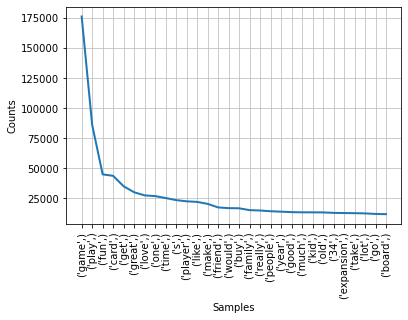

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
fdist_unigram.plot(30,cumulative=False)

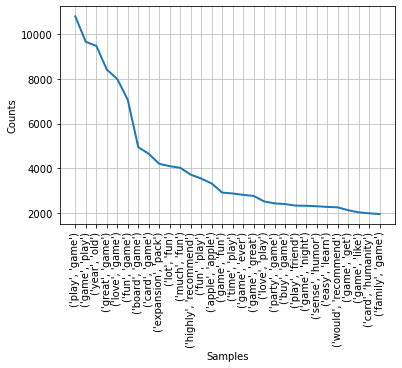

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
fdist_bigram.plot(30,cumulative=False)

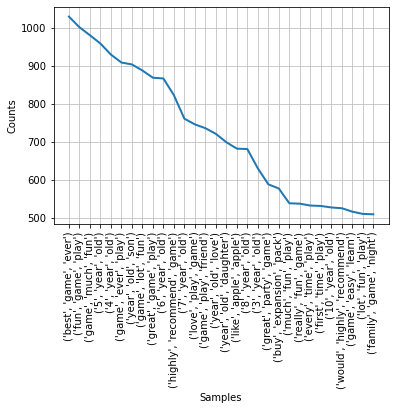

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [10]:
fdist_trigram.plot(30,cumulative=False)

In [25]:
to_delete = []
for i in range(len(amazon)):
        to_delete.append(i)
amazon.drop(to_delete, inplace=True)

30675
<class 'float'>
nan
33449
<class 'float'>
nan


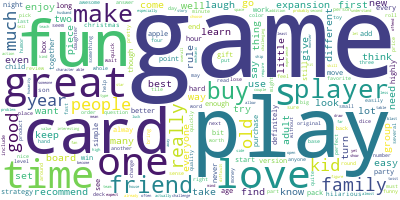

In [26]:
long_string = ','.join(list(amazon["lemmatize"].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, collocations=False,contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

# Basic Analysis

In [9]:
df = pd.read_csv("datasets/df_preprocessed.csv")
display(df.head(3))
print(f'Total reviews {len(df)}')

article_id                                            content  game_id  \
0   9577632.0  -- Originally posted in <a href="http://www.bo...    63628   
1  21025739.0  Hello! Welcome to the review. Have a seat! Cri...   129622   
2   1393556.0  <b>Overview</b>\n<br/><i>Bang!</i> is a chaoti...     3955   

   id_review                   postdate  \
0     826767  2012-07-11T02:58:18-05:00   
1    1478800  2015-11-24T15:38:07-06:00   
2     156620  2007-03-16T11:53:12-05:00   

                                          subject    username  \
0  A Pro-Wrestler's Review: The Manhattan Project  Bigshowfan   
1                  Love Letter ~ Deranged Review.    Derang3d   
2                             I Shot the Sheriff…      otha62   

                                         review_text  \
0  -- Originally posted in  MY BLOG  --\n \n \n \...   
1  Hello! Welcome to the review. Have a seat! Cri...   
2  Overview \n Bang!  is a chaotic ‘take that’ ca...   

                                            text_nsw  \
0  -- originally posted blog -- manhattan project...   
1  hello ! welcome review . seat ! criticism welc...   
2  overview bang ! chaotic ‘ take ’ card game 4 7...   

                                           text_nswp  \
0  originally posted blog manhattan project 2011 ...   
1  hello welcome review seat criticism welcome bi...   
2  overview bang chaotic ‘ take card game 4 7 pla...   

                                           lemmatize  
0  originally post blog manhattan project 2011 wo...  
1  hello welcome review seat criticism welcome bi...  
2  overview bang chaotic ' take card game 4 7 pla...

Total reviews 100


In [28]:
amazon.columns

Index(['level_0', 'index', 'marketplace', 'customer_id', 'review_id',
       'product_id', 'product_parent', 'product_title', 'product_category',
       'star_rating', 'helpful_votes', 'total_votes', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'flesch_reading_ease',
       'flesch_kincaid_grade', 'coleman_liau_index',
       'automated_readability_index', 'dale_chall_readability_score',
       'difficult_words', 'linsear_write_formula', 'gunning_fog',
       'text_standard', 'sentence_count', 'lexicon_count', 'sw', 'lemmatize'],
      dtype='object')

In [45]:
print(amazon['lexicon_count'].describe())
print('----------------------')
print(amazon['sentence_count'].describe())
print('----------------------')
print(amazon['text_standard'].describe())

count    96086.000000
mean        60.812199
std        112.836832
min          1.000000
25%         20.000000
50%         31.000000
75%         63.000000
max       4655.000000
Name: lexicon_count, dtype: float64
----------------------
count    96086.000000
mean         2.560945
std          3.701045
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        209.000000
Name: sentence_count, dtype: float64
----------------------
count                 96086
unique                  290
top       5th and 6th grade
freq                  13506
Name: text_standard, dtype: object


In [48]:
import re
def count_tokens(text):
    return(len(word_tokenize(str(text))))

In [49]:
print(f'Total number of reviews (in english): {len(df)}')

NameError: name 'df' is not defined

In [122]:
# Number of words of text without URL and HTML
amazon["n_words"] = amazon["review_body"].progress_apply(lambda x: len(re.findall(r'\w+', x)))

100%|██████████| 96086/96086 [00:02<00:00, 38761.89it/s]
<ipython-input-122-a1dd32639343>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon["n_words"] = amazon["review_body"].progress_apply(lambda x: len(re.findall(r'\w+', x)))


In [1]:
amazon['n_words'].describe()

NameError: name 'amazon' is not defined

In [119]:
#amazon.drop(['level_0'], axis=1, inplace=True)
#amazon.reset_index(inplace = True)

In [120]:
temp.columns

Index(['customer_id', 'review_id', 'product_title', 'star_rating',
       'helpful_votes', 'review_headline', 'review_body', 'review_date',
       'flesch_reading_ease', 'text_standard', 'sentence_count',
       'lexicon_count', 'lemmatize', 'n_words'],
      dtype='object')

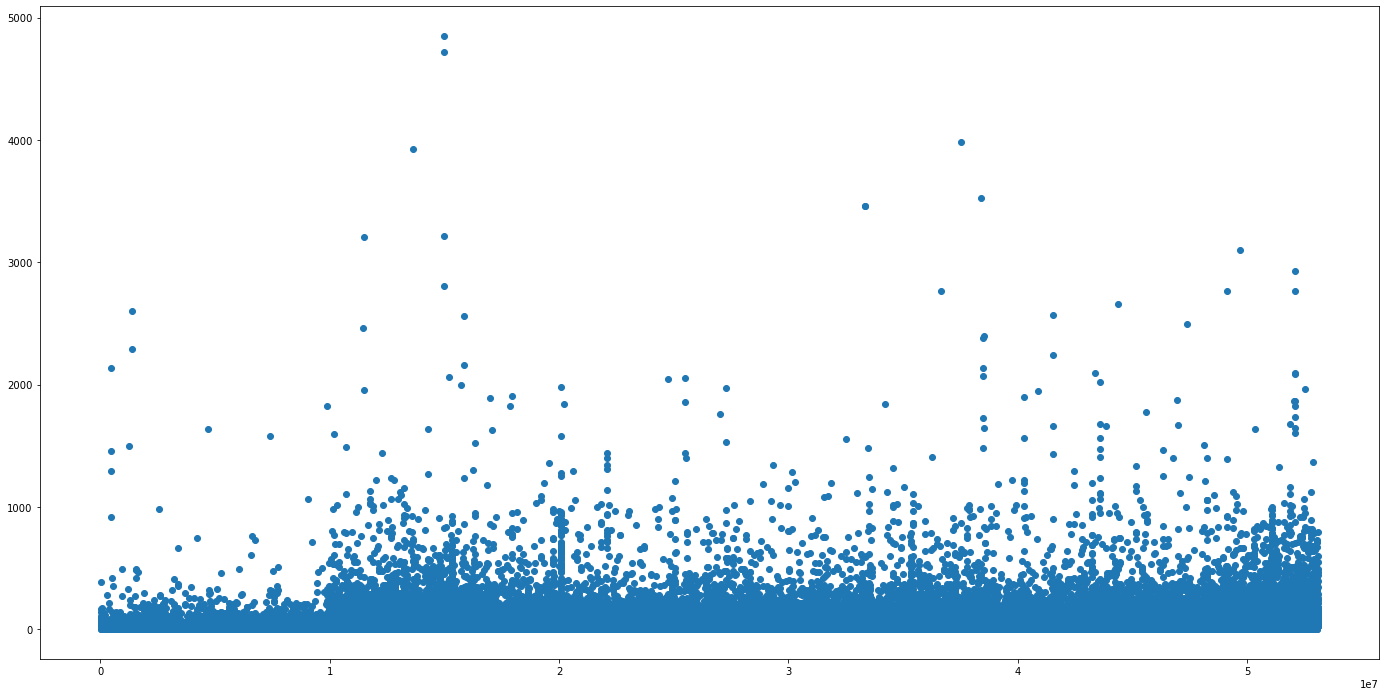

In [123]:
#sns.lmplot(data=amazon, x="index", y="lexicon_count")
#Removing the outliers, that is the reviews that have length of more than 500 lexicons, its

'''to_delete = []
a = 0
for i in range(len(amazon)):
    if amazon["lexicon_count"][i] > 500:
        to_delete.append(i)
        a = a+1
temp = amazon.drop(to_delete)
print(a)'''

fig, ax = plt.subplots(figsize=(24,12))
ax.scatter(x=amazon["customer_id"], y=amazon["n_words"])

990


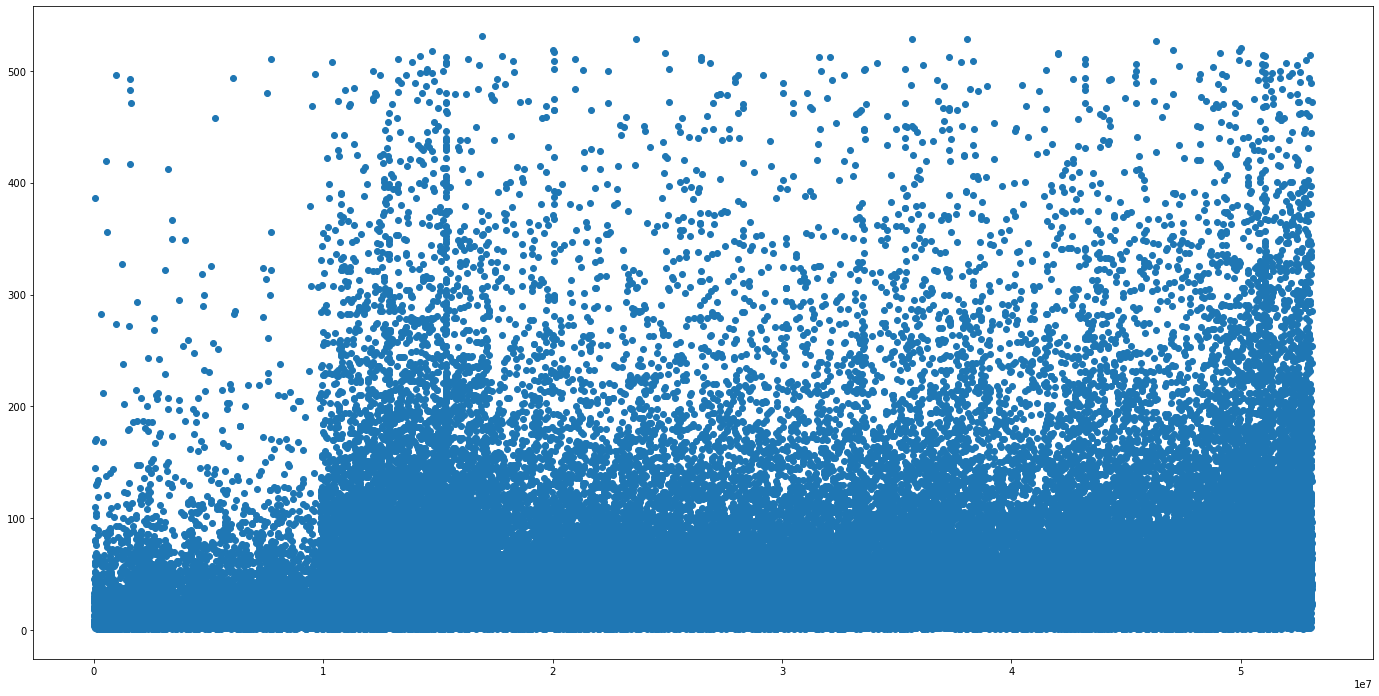

In [124]:
to_delete = []
a = 0
for i in range(len(amazon)):
    if amazon["lexicon_count"][i] > 500:
        to_delete.append(i)
        a = a+1
temp = amazon.drop(to_delete)
print(a)

fig, ax = plt.subplots(figsize=(24,12))
ax.scatter(x=temp["customer_id"], y=temp["n_words"])

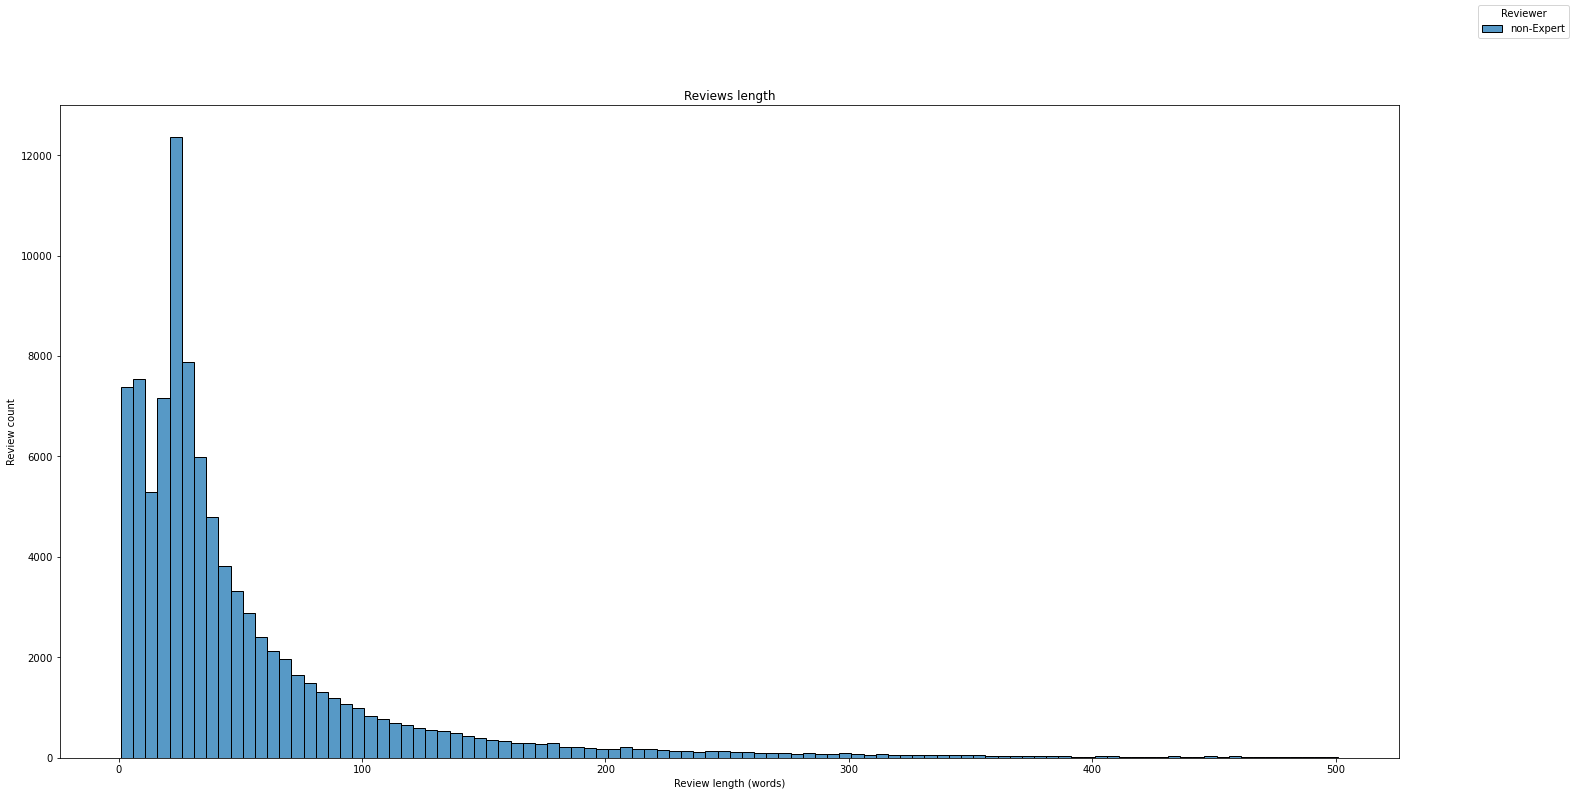

In [125]:
fig, ax = plt.subplots(figsize=(24,12))
sns.histplot(temp['lexicon_count'], ax=ax,  binwidth=5)
ax.figure.legend(title='Reviewer', labels=['non-Expert'])
ax.set_title("Reviews length")
ax.set_ylabel('Review count')
ax.set_xlabel('Review length (words)')
plt.show()

In [101]:
#Number of tokens before preprocessing
temp['n_tokens_before'] = temp['review_body'].progress_apply(count_tokens)

100%|██████████| 95096/95096 [00:56<00:00, 1670.28it/s]


In [102]:
#number of tokens after preprocessing
temp['n_tokens_after'] = temp['lemmatize'].progress_apply(count_tokens)

100%|██████████| 95096/95096 [00:19<00:00, 4917.27it/s]


In [104]:
print("Number of tokens before preprocessing")
print(f'Min: {temp["n_tokens_before"].min()} tokens')
print(f'Max: {temp["n_tokens_before"].max()} tokens')
print(f'Mean: {temp["n_tokens_before"].mean()} tokens')

Number of tokens before preprocessing
Min: 1 tokens
Max: 672 tokens
Mean: 62.30774165054261 tokens


In [105]:
print("Number of tokens after preprocessing")
print(f'Min: {temp["n_tokens_after"].min()} tokens')
print(f'Max: {temp["n_tokens_after"].max()} tokens')
print(f'Mean: {temp["n_tokens_after"].mean()} tokens')

Number of tokens after preprocessing
Min: 1 tokens
Max: 318 tokens
Mean: 26.48133465129974 tokens


In [109]:
amazon = amazon[['customer_id', 'review_id','product_title','star_rating',
       'helpful_votes', 'review_headline',
       'review_body', 'review_date','flesch_reading_ease', 'text_standard', 'sentence_count', 'lexicon_count','lemmatize']]

In [110]:
amazon.to_csv('amazon_used.csv', index = False)

# Readability Analysis
Applied on the review only without URL and HTML

In [16]:
df["flesch_reading_ease"] = df['review_text'].progress_apply(lambda text: textstat.flesch_reading_ease(str(text)))
print("\n\nFlesch reading ease given review without html and URLs")
print(f'Min: {df["flesch_reading_ease"].min()}')
print(f'Max: {df["flesch_reading_ease"].max()}')
print(f'Mean: {df["flesch_reading_ease"].mean()}')

100%|██████████| 100/100 [00:01<00:00, 83.94it/s]

Flesch reading ease given review without html and URLs
Min: -3518.92
Max: 121.22
Mean: -99.073



In [17]:
df["flesch_kincaid_grade"] = df['review_text'].progress_apply(lambda text: textstat.flesch_kincaid_grade(str(text)))
print("\n\nFlesch Kincaid Grade given review without html and URLs")
print(f'Min: {df["flesch_kincaid_grade"].min()}')
print(f'Max: {df["flesch_kincaid_grade"].max()}')
print(f'Mean: {df["flesch_kincaid_grade"].mean()}')


100%|██████████| 100/100 [00:00<00:00, 919.24it/s]

Flesch Kincaid Grade given review without html and URLs
Min: -3.5
Max: 1387.0
Mean: 72.29899999999999



In [18]:
df["smog_index"] = df['review_text'].progress_apply(lambda text: textstat.smog_index(str(text)))
print("\n\nSMOG Index given review without html and URLs")
print(f'Min: {df["smog_index"].min()}')
print(f'Max: {df["smog_index"].max()}')
print(f'Mean: {df["smog_index"].mean()}')

100%|██████████| 100/100 [00:00<00:00, 226.43it/s]

SMOG Index given review without html and URLs
Min: 0.0
Max: 35.6
Mean: 12.056



In [10]:
df = pd.read_csv("datasets/bgg_reviews_mesures.csv")
display(df.head(5))
print(f'Total reviews {len(df)}')

article_id                                            content  game_id  \
0  34335623.0  Pandemic is the one of those legendary games I...    30549   
1   4609414.0  <b>Introduction</b>\n<br/>You may be wondering...    30549   
2  35192693.0  Pandemic: A Lucky Combination \n<br/><i>The di...    30549   
3  34797479.0  Yes that's right, Pandemic was my first co-op ...    30549   
4  34818113.0  1 - Play Count\n<br/>Pandemic is one of the Bo...    30549   

   id_review                   postdate  \
0    2392017  2020-03-21T11:50:46-05:00   
1     492895  2010-02-07T11:17:46-06:00   
2    2454679  2020-06-25T10:00:05-05:00   
3    2426480  2020-05-11T12:46:24-05:00   
4    2427847  2020-05-13T12:40:08-05:00   

                                    subject              username  \
0  10 plays in... and I’m trying to love it  Readinguselessmessag   
1                             Solo Pandemic              dumbname   
2             Pandemic: A Lucky Combination             woodshard   
3          My first co-op gaming experience              dsoccer5   
4                               Great Game!               edandme   

                                         review_text  \
0  Pandemic is the one of those legendary games I...   
1  Introduction \n You may be wondering why the t...   
2  Pandemic: A Lucky Combination \n The dim sunli...   
3  Yes that's right, Pandemic was my first co-op ...   
4  1 - Play Count\n Pandemic is one of the Board ...   

                                            text_nsw  \
0  pandemic one legendary games feel love ’ many ...   
1  introduction may wondering title review simply...   
2  pandemic : lucky combination dim sunlight dawn...   
3  yes 's right , pandemic first co-op gaming exp...   
4  1 - play count pandemic one board games play h...   

                                           text_nswp language  \
0  pandemic one legendary games feel love many pe...       en   
1  introduction may wondering title review simply...       en   
2  pandemic lucky combination dim sunlight dawn l...       en   
3  yes s right pandemic first coop gaming experie...       en   
4  1 play count pandemic one board games play hou...       en   

   n_tokens_content  n_tokens_text_nswp  n_characteres_content  \
0               762                 293                   3370   
1               776                 288                   3305   
2              3605                1442                  15745   
3               995                 343                   4525   
4               618                 217                   2913   

   n_characteres_text_nswp  flesch_reading_ease  coleman_liau_index  \
0                     1958              -204.44               10.13   
1                     1955                43.90                9.99   
2                     9358                81.73                6.89   
3                     2226                -8.45                8.38   
4                     1475                67.08                7.89   

   automated_readability_index  difficult_words  
0                        144.6               81  
1                         19.1               79  
2                          6.7              242  
3                         47.1               71  
4                         10.0               51

Total reviews 44259


In [11]:
df = df.dropna(subset=['text_nsw'])
print(f'Total reviews {len(df)}')

Total reviews 44259


In [12]:
df["text_standard"] = df['review_text'].progress_apply(lambda text: textstat.text_standard(str(text)))

100%|██████████| 44259/44259 [17:45:49<00:00,  1.44s/it]


In [14]:
df

article_id                                            content  game_id  \
0      34335623.0  Pandemic is the one of those legendary games I...    30549   
1       4609414.0  <b>Introduction</b>\n<br/>You may be wondering...    30549   
2      35192693.0  Pandemic: A Lucky Combination \n<br/><i>The di...    30549   
3      34797479.0  Yes that's right, Pandemic was my first co-op ...    30549   
4      34818113.0  1 - Play Count\n<br/>Pandemic is one of the Bo...    30549   
...           ...                                                ...      ...   
44254  21273717.0  <font color=#2121A4><div class='quote'><div cl...   178487   
44255  19936674.0  <center><div style=''><a href="https://boardga...   178487   
44256  19714764.0  <div style=''><a href="https://boardgamegeek.c...   178487   
44257  35912628.0  <center><div style=''><a href="https://boardga...   303648   
44258  31185714.0  [use the link here to see this review in its o...   252962   

       id_review                   postdate  \
0        2392017  2020-03-21T11:50:46-05:00   
1         492895  2010-02-07T11:17:46-06:00   
2        2454679  2020-06-25T10:00:05-05:00   
3        2426480  2020-05-11T12:46:24-05:00   
4        2427847  2020-05-13T12:40:08-05:00   
...          ...                        ...   
44254    1493018  2015-12-21T12:38:37-06:00   
44255    1411095  2015-08-01T13:39:37-05:00   
44256    1397714  2015-07-07T14:29:46-05:00   
44257    2511424  2020-09-27T23:52:29-05:00   
44258    2146098  2019-02-06T14:09:55-06:00   

                                                 subject  \
0               10 plays in... and I’m trying to love it   
1                                          Solo Pandemic   
2                          Pandemic: A Lucky Combination   
3                       My first co-op gaming experience   
4                                            Great Game!   
...                                                  ...   
44254  Fistful of Cards: an iSlaytheDragon Review of ...   
44255                   Club Fantasci Review: Bountytown   
44256                    Gaming Bits:  Bountytown Review   
44257  The Charity Boardgamer reviews Hocus Pocus: Th...   
44258  Sports Dice Football - Roll To Gridiron Victor...   

                   username  \
0      Readinguselessmessag   
1                  dumbname   
2                 woodshard   
3                  dsoccer5   
4                   edandme   
...                     ...   
44254       Spielemitkinder   
44255              Moezilla   
44256        MillicanDarque   
44257             cmgoodlet   
44258        familygamersaa   

                                             review_text  \
0      Pandemic is the one of those legendary games I...   
1      Introduction \n You may be wondering why the t...   
2      Pandemic: A Lucky Combination \n The dim sunli...   
3      Yes that's right, Pandemic was my first co-op ...   
4      1 - Play Count\n Pandemic is one of the Board ...   
...                                                  ...   
44254  The original review, and  MUCH, MUCH  more gam...   
44255  \n \n Publisher:  Victory Point Games \n \n Ga...   
44256  \n Bountytown  is a game by  Kyle Van Winkle  ...   
44257  \n \n \n The Sanderson Sisters are at it again...   
44258  [use the link here to see this review in its o...   

                                                text_nsw  \
0      pandemic one legendary games feel love ’ many ...   
1      introduction may wondering title review simply...   
2      pandemic : lucky combination dim sunlight dawn...   
3      yes 's right , pandemic first co-op gaming exp...   
4      1 - play count pandemic one board games play h...   
...                                                  ...   
44254  original review , much , much gaming content ,...   
44255  publisher : victory point games game designer ...   
44256  bountytown game kyle van winkle michael huven-...   
44257  sanderson sisters . somehow released onto worl.

In [15]:
df.to_csv("datasets/bgg_reviews_mesures.csv", index=False)  

# LDA Analysis

In [2]:
df = pd.read_csv("bgg_temp2.csv")
display(df.head(2))
df = df.dropna(subset=['text_nswp'])
print(f'\nEnglish reviews after drop NaN {len(df)}')

/Users/lyssascherer/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


article_id                                            content  game_id  \
0  34335623.0  Pandemic is the one of those legendary games I...    30549   
1   4609414.0  <b>Introduction</b>\n<br/>You may be wondering...    30549   

   id_review                   postdate  \
0    2392017  2020-03-21T11:50:46-05:00   
1     492895  2010-02-07T11:17:46-06:00   

                                    subject              username  \
0  10 plays in... and I’m trying to love it  Readinguselessmessag   
1                             Solo Pandemic              dumbname   

                                         review_text  \
0  Pandemic is the one of those legendary games I...   
1  Introduction \n You may be wondering why the t...   

                                            text_nsw  \
0  pandemic one legendary games feel love ’ many ...   
1  introduction may wondering title review simply...   

                                           text_nswp language  \
0  pandemic one legendary games feel love many pe...       en   
1  introduction may wondering title review simply...       en   

                                           lemmatize  
0  pandemic one legendary game feel love many peo...  
1  introduction may wonder title review simply pa...


English reviews after drop NaN 44259


In [3]:
def create_lda_models(data_words):   
    try:
        id2word = corpora.Dictionary.load("lda_models/id2word_bgg")
    except:
        id2word = corpora.Dictionary(data_words)
        id2word.save("lda_models/id2word_bgg")

    corpus = [id2word.doc2bow(doc) for doc in data_words]
    lda_model_10 = gensim.models.LdaModel(corpus=corpus,id2word=id2word,num_topics=10)
    lda_model_3 = gensim.models.LdaModel(corpus=corpus, id2word=id2word,num_topics=3)
    lda_model_10.save('lda_models/lda_model_10')
    lda_model_3.save('lda_models/lda_model_3')
    return lda_model_10, lda_model_3

/Users/lyssascherer/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
try: 
    lda_model_10 = gensim.models.LdaModel.load('lda_models/lda_model_10')
    lda_model_3 = gensim.models.LdaModel.load('lda_models/lda_model_3')
except:
    data_words = df["lemmatize"].apply(lambda x : word_tokenize(str(x))).values.tolist()
    lda_model_10, lda_model_3 = create_lda_models(data_words)

/Users/lyssascherer/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
pprint(lda_model_3.print_topics())
# doc_lda = lda_model_3[corpus]

[(0,
  '0.028*"card" + 0.026*"game" + 0.015*"player" + 0.011*"play" + 0.009*"one" + '
  '0.007*"``" + 0.007*"deck" + 0.007*"use" + 0.006*"turn" + 0.006*"unit"'),
 (1,
  '0.034*"player" + 0.031*"game" + 0.020*"card" + 0.013*"one" + 0.011*"tile" + '
  '0.011*"play" + 0.010*"point" + 0.010*"place" + 0.008*"board" + '
  '0.007*"turn"'),
 (2,
  '0.043*"game" + 0.017*"play" + 0.011*"\'s" + 0.010*"card" + 0.009*"get" + '
  '0.009*"one" + 0.009*"not" + 0.009*"player" + 0.008*"like" + 0.007*"rule"')]
/Users/lyssascherer/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
pprint(lda_model_10.print_topics())
# doc_lda = lda_model_10[corpus]

[(0,
  '0.042*"player" + 0.036*"dice" + 0.031*"card" + 0.027*"game" + 0.025*"roll" '
  '+ 0.011*"die" + 0.011*"action" + 0.011*"one" + 0.009*"turn" + 0.009*"use"'),
 (1,
  '0.025*"player" + 0.023*"card" + 0.021*"ship" + 0.017*"move" + 0.013*"space" '
  '+ 0.013*"token" + 0.013*"one" + 0.012*"game" + 0.010*"place" + '
  '0.009*"board"'),
 (2,
  '0.055*"game" + 0.021*"play" + 0.011*"\'s" + 0.011*"player" + 0.011*"board" '
  '+ 0.011*"one" + 0.010*"get" + 0.010*"rule" + 0.009*"not" + 0.008*"like"'),
 (3,
  '0.027*"game" + 0.020*"``" + 0.011*"one" + 0.009*"play" + 0.008*"player" + '
  '0.007*"get" + 0.006*"time" + 0.006*"like" + 0.006*"card" + 0.006*"make"'),
 (4,
  '0.036*"player" + 0.034*"game" + 0.029*"tile" + 0.013*"one" + 0.013*"place" '
  '+ 0.012*"point" + 0.010*"board" + 0.009*"action" + 0.009*"play" + '
  '0.007*"``"'),
 (5,
  '0.088*"card" + 0.047*"game" + 0.033*"play" + 0.032*"player" + 0.012*"one" + '
  '0.010*"hand" + 0.009*"point" + 0.008*"get" + 0.008*"deck" + 0.007*"take"')

# Sentiment Analysis

In [2]:
def document_sentiment(text):
    doc = nlp(text)
    sentiments = [sentence.sentiment for sentence in doc.sentences]
    num_sentences = len(doc.sentences)
    negative = Counter(sentiments)[0]/num_sentences if Counter(sentiments)[0] else 0 
    neutral = Counter(sentiments)[1]/num_sentences if Counter(sentiments)[1] else 0 
    positive = Counter(sentiments)[2]/num_sentences if Counter(sentiments)[2] else 0 
    return negative, neutral, positive

In [3]:
#Read CSV with review_text column (no html, no URL and only english)
df = pd.read_csv("datasets/bgg_reviews_en.csv")
df = df.dropna(subset=['text_nswp'])
print(f'\nEnglish reviews after drop NaN {len(df)}')


English reviews after drop NaN 44259


In [5]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment')
df["sent_negative"], df["sent_neutral"], df["sent_positive"] = zip(*df['review_text'].progress_apply(document_sentiment))
df.to_csv("datasets/bgg_reviews_sentiment.csv", index=False)  

2021-01-10 22:58:25 INFO: Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | ewt     |
| sentiment | sstplus |

2021-01-10 22:58:25 INFO: Use device: cpu
2021-01-10 22:58:25 INFO: Loading: tokenize
2021-01-10 22:58:25 INFO: Loading: sentiment
2021-01-10 22:58:27 INFO: Done loading processors!
100%|██████████| 44259/44259 [15:44:31<00:00,  1.28s/it]


In [29]:
df_sentiment = pd.read_csv("datasets/bgg_reviews_sentiment.csv")

In [30]:
df_len = len(df_sentiment)
neg = df_sentiment["sent_negative"].sum()/df_len
neu = df_sentiment["sent_neutral"].sum()/df_len
pos = df_sentiment["sent_positive"].sum()/df_len
print("Overall probability BGG:")
print(f'negative {neg}')
print(f'neutral {neu}')
print(f'positive {pos}')
print(f'sum_all {neg+neu+pos}')

Overall probability BGG:
negative 0.1580836689173945
neutral 0.699696665169256
positive 0.14221966591334953
sum_all 1.0


In [43]:
print(f'{len(df_sentiment[((df_sentiment["sent_negative"] > df_sentiment["sent_neutral"]) & (df_sentiment["sent_negative"] > df_sentiment["sent_positive"]))])} reviews with a higher probability of being negative compared to positive and neutral')
print(f'{len(df_sentiment[((df_sentiment["sent_neutral"] > df_sentiment["sent_negative"]) & (df_sentiment["sent_neutral"] > df_sentiment["sent_positive"]))])} reviews with a higher probability of being neutral compared to the negative and positive')
print(f'{len(df_sentiment[((df_sentiment["sent_positive"] > df_sentiment["sent_neutral"]) & (df_sentiment["sent_positive"] > df_sentiment["sent_negative"]))])} reviews with a higher probability of being positive compared to the negative and neutral')


356 reviews with a heigher probability of being negative compared to positive and neutral
43098 reviews with a heigher probability of being neutral compared to the negative and positive
361 reviews with a heigher probability of being positive compared to the negative and neutral


In [32]:
print(f'{len(df_sentiment[df_sentiment["sent_negative"] > df_sentiment["sent_positive"] ])} reviews with a higher probability of being negative compared to positive')
print(f'{len(df_sentiment[df_sentiment["sent_positive"] > df_sentiment["sent_negative"] ])} reviews with a higher probability of being positive compared to negative')
print(f'{len(df_sentiment[df_sentiment["sent_positive"] == df_sentiment["sent_negative"] ])} reviews with a higher probability of being positive compared to negative')

23247 reviews with a heigher probability of being negative compared to positive
17509 reviews with a heigher probability of being positive compared to negative
3503 reviews with a heigher probability of being positive compared to negative
